## Emotion Detection

**Importing Libraries**

In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


**Exploring Dataset**

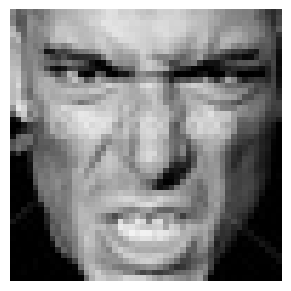

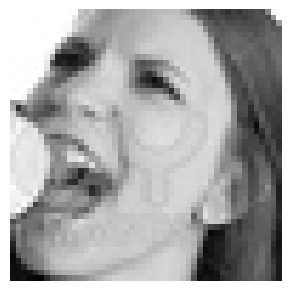

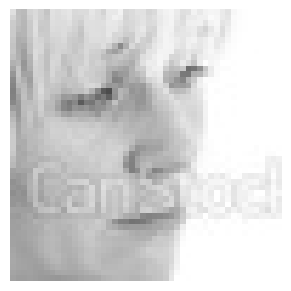

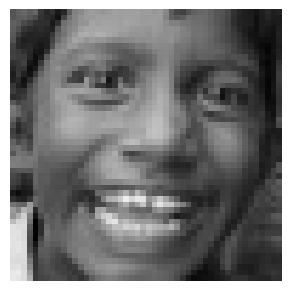

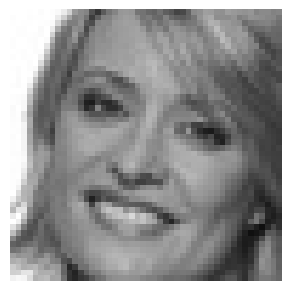

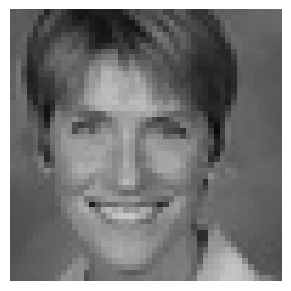

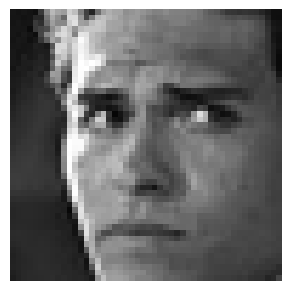

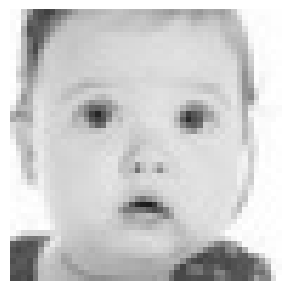

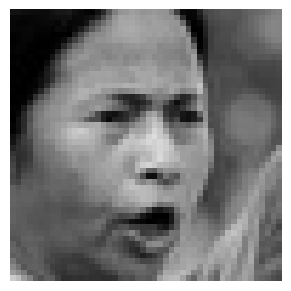

In [7]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize = (12, 12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image)); plt.axis('off')

In [22]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("test/",
                                                   target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [23]:
def Convulation(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [24]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)

    return x

In [33]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convulation(inputs, 32, (3,3))
    conv_2 = Convulation(inputs, 64, (5,5))
    conv_3 = Convulation(inputs, 128, (3,3))

    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    output = Dense(7, activation = 'softmax')(dense_1)
    model = Model(inputs = [inputs], outputs = [output])

    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    return model

In [34]:
model = model_fer((48, 48, 1))
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_17 (Ba  (None, 48, 48, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_17 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 24, 24, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 128)       0   

**Initializing the Model**

In [35]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = "val_accuracy", save_weights_only = True, mode = "max", verbose = 1)
callbacks = [checkpoint]


## Training the Model

In [36]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1.6512 - accuracy: 0.3764
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 473s 1s/step - loss: 1.6512 - accuracy: 0.3764 - val_loss: 1.6151 - val_accuracy: 0.3627
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3528 - accuracy: 0.4874
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 145s 324ms/step - loss: 1.3528 - accuracy: 0.4874 - val_loss: 1.5046 - val_accuracy: 0.4342
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1945 - accuracy: 0.5544
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 147s 328ms/step - loss: 1.1945 - accuracy: 0.5544 - val_loss: 1.4229 - val_accuracy: 0.4528
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0622 - accuracy: 0.6080
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 1

**Evaluate the Model**

In [37]:
model.evaluate(validation_generator)

113/113 [==============================] - 6s 57ms/step - loss: 1.9726 - accuracy: 0.4962


[1.9726215600967407, 0.49623849987983704]

**Plotting Loss**

C:\Users\Neelam\AppData\Local\Temp\ipykernel_2904\408938427.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Train', 'Validation', loc = 'upper left')


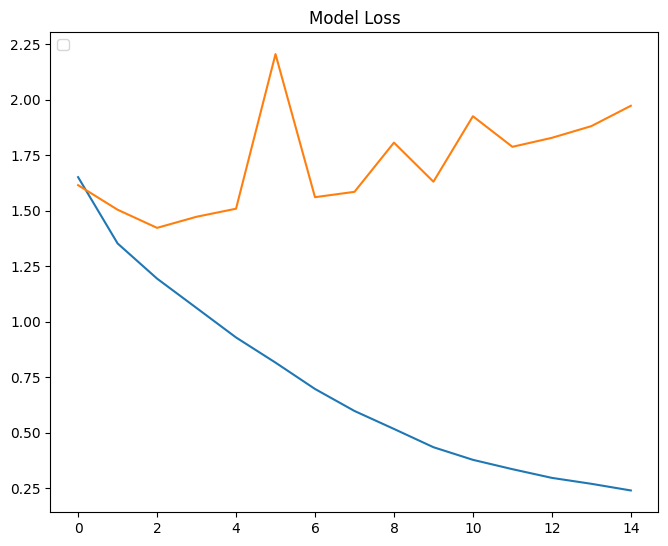

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend('Train', 'Validation', loc = 'upper left')
plt.subplots_adjust(top = 1, bottom = 0, right = 0.95, left = 0, hspace = 0.25, wspace = 0.35)

C:\Users\Neelam\AppData\Local\Temp\ipykernel_2904\3172088333.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Train', 'Validation', loc = 'upper left')


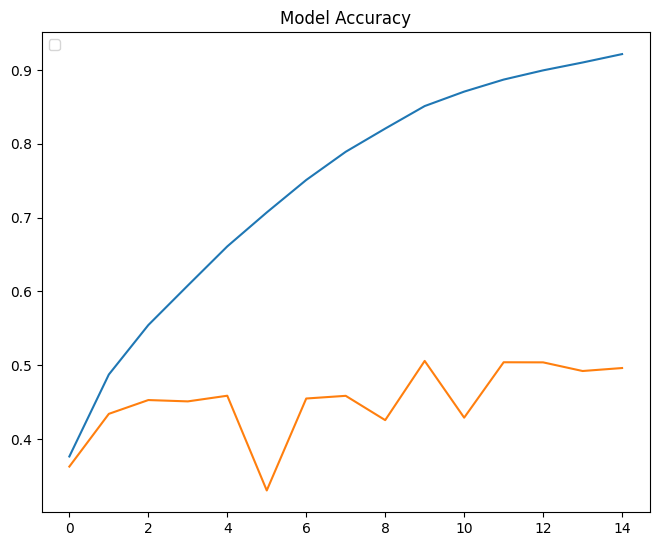

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend('Train', 'Validation', loc = 'upper left')
plt.subplots_adjust(top = 1, bottom = 0, right = 0.95, left = 0, hspace = 0.25, wspace = 0.35)

**Saving Model**

In [40]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)